# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---

## **Aula Prática 5 - Parte 1:** $\underline{Plotando\ e\ Analisando\ Relâmpagos\ Estimados\ pelo\ Satélite\ GOES-16}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como trabalhar com dados de relâmpagos estimado por satélite. Para isto usaremos os dados do sensor [Geostationary Lightning Mapper (GLM)](https://space.oscar.wmo.int/instruments/view/glm) abordo do satélite [Geostationary Operational Environmental Satellite - 16 (GOES-16)](https://space.oscar.wmo.int/satellites/view/goes_16). O objetivo dessa **Parte 1** é aprender como plotar e analisar os dados a cada 20s do GLM e combiná-los com imagens de satélite.

---


**DADOS DE ENTRADA**: Arquivos de relâmpagos.

1. $\underline{Dados\ de\ Relâmpagos}$: sensor GLM do satélite GOES-16
- **Tipo do dado:** pontuais
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** OR_GLM-L2-LCFA_G16_s20210010306000_e20210010306204_c20210010306215
- **Fonte dos dados:** FTP da [Amazon](https://noaa-goes16.s3.amazonaws.com/index.html#GLM-L2-LCFA/)

    ----------

2. $\underline{Dados\ de\ Tempertura\ de\ Brilho}$: sensor ABI do satélite GOES-16
- **Tipo do dado:** matriz
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635346_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/)


---

**DADOS DE SAÍDA:** .
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. Fig_1_goes16_flash_20210101_1700.jpg
    2. Fig_2_goes16_flash_20210101_1700_recorte.jpg
    3. Fig_3_goes16_flash_20210101_1700_recorte.jpg
    4. Fig_3_animation.gif
    5. Fig_4_goes16_evento_grupo_flash_20210101_1700_recorte.jpg

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Download dos shapefiles
6.   Define funções
7.   Conhecendo os dados de relâmpagos a cada 20 s do sensor GLM
8.   Combinando imagem de satélite com flashes: América do Sul
9.   Combinando imagem de satélite com flashes: Área com recorte
10. Faz animação das imagens combinadas de satélite e flashes: Área com recorte
11. Combinando imagem de satélite com eventos, grupos e flashes: Área com recorte


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 18/05/2022
- **Atualizado por:** Enrique V. Mattos - 07/11/2023


---


# **1° Passo:** Instalando as bibliotecas

In [ ]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install -q proplot

# Instalando o cartopy (usado para gerar Mapas)
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

Chegando aqui, será necessário fazer a **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

In [ ]:
# Instalando a biblioteca Salem
!pip install rasterio -q
!pip install pyproj -q
!pip install geopandas -q
!pip install salem -q
!pip install descartes -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.9 MB/s eta 0:00:00


In [ ]:
# Instalando o boto3 (usado para baixar os dados da Amazon)
!pip install boto3 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.6 MB/s eta 0:00:00


# **2° Passo:** Montando drive

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3° Passo:** Caminho do diretório

- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_05_RELAMPAGOS/'

- **Criando a pasta de saída ("output")**


In [ ]:
import os
os.makedirs(f'{dir}output', exist_ok=True)

# **4° Passo:** Importando as bibliotecas

In [60]:
import proplot as plot
import time as t
import glob
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import os
from time import process_time
import calendar
import salem
import xarray as xr
import pandas as pd

from datetime import timedelta, date, datetime
import imageio                           # Python interface to read and write a wide range of image data

import boto3                             # Amazon Web Services (AWS) SDK for Python
from botocore import UNSIGNED            # boto3 config
from botocore.config import Config       # boto3 config

import sys
sys.path.append(f'{dir}')
from cpt_convert import loadCPT

from matplotlib.colors import LinearSegmentedColormap # interpolação linear para as cores dos mapas
from matplotlib import cm                             # Colormap handling utilities

import warnings
warnings.filterwarnings("ignore")

# **5° Passo:** Shapefiles
- Iremos utilizar os arquivos shapefiles do território brasileiro. Os dados serão baixados direto do meu [GitHub](https://github.com/evmpython/shapefile).

In [ ]:
# url
url = 'https://github.com/evmpython/shapefile/raw/main/'

# caminho completo do arquivo. Exemplo: !wget https://github.com/evmpython/shapefile/raw/main/BR_UF_2019.shp
file1 = f'{url}BR_UF_2019.cpg'
file2 = f'{url}BR_UF_2019.dbf'
file3 = f'{url}BR_UF_2019.prj'
file4 = f'{url}BR_UF_2019.shp'
file5 = f'{url}BR_UF_2019.shx'

# baixa o shapefile
!wget -c {file1}
!wget -c {file2}
!wget -c {file3}
!wget -c {file4}
!wget -c {file5}

# lendo shapefile de todos Estados do Brasil
estados = salem.read_shapefile('/content/BR_UF_2019.shp')
estados

--2023-11-08 18:13:58--  https://github.com/evmpython/shapefile/raw/main/BR_UF_2019.cpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/shapefile/main/BR_UF_2019.cpg [following]
--2023-11-08 18:13:58--  https://raw.githubusercontent.com/evmpython/shapefile/main/BR_UF_2019.cpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5 [text/plain]
Saving to: ‘BR_UF_2019.cpg’

BR_UF_2019.cpg      100%[===================>]       5  --.-KB/s    in 0s      

2023-11-08 18:13:58 (206 KB/s) - ‘BR_UF_2019.cpg’ saved [5/5]

--2023-11-08 18:13:59--  https://github.com/evmpython/shapefile/raw/main/BR

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,min_x,max_x,min_y,max_y
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4...",-66.810253,-59.774357,-13.693700,-7.975868
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828...",-73.990450,-66.623754,-11.145561,-7.111824
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620...",-73.801558,-56.097558,-9.818046,2.246631
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416...",-64.825254,-58.886884,-1.580633,5.271841
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",-58.898328,-46.061425,-9.841153,2.591027
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",-54.876250,-49.875682,-1.236176,4.508817
6,17,Tocantins,TO,Norte,"POLYGON ((-48.23163 -5.94614, -48.23011 -5.938...",-50.742064,-45.699265,-13.467713,-5.168381
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.53830 -2.02124, -44.53742 ...",-48.755151,-41.795884,-10.261765,-1.049328
8,22,Piauí,PI,Nordeste,"POLYGON ((-42.91539 -6.64607, -42.91645 -6.644...",-46.028207,-40.370510,-10.928756,-2.749753
9,23,Ceará,CE,Nordeste,"POLYGON ((-41.18292 -4.01797, -41.18552 -4.017...",-41.423518,-37.252659,-7.858182,-2.784323


# **6° Passo:** Definindo funções

**Função que baixa os dados do GLM (GOES-16) no site de Amazon**

In [ ]:
def download_GLM(yyyymmddhhmnss, path_dest):

    # caminho dos dados do sensor GLM na Amazon
    #ftp_glm = 'https://noaa-goes16.s3.amazonaws.com/index.html#GLM-L2-LCFA/'

    os.makedirs(path_dest, exist_ok=True)

    year = datetime.strptime(yyyymmddhhmnss, '%Y%m%d%H%M%S').strftime('%Y')

    day_of_year = datetime.strptime(yyyymmddhhmnss, '%Y%m%d%H%M%S').strftime('%j')

    hour = datetime.strptime(yyyymmddhhmnss, '%Y%m%d%H%M%S').strftime('%H')
    min = datetime.strptime(yyyymmddhhmnss, '%Y%m%d%H%M%S').strftime('%M')
    seg = datetime.strptime(yyyymmddhhmnss, '%Y%m%d%H%M%S').strftime('%S')

    # AMAZON repository information
    # https://noaa-goes16.s3.amazonaws.com/index.html
    bucket_name = 'noaa-goes16'

    # Initializes the S3 client
    s3_client = boto3.client('s3', config=Config(signature_version=UNSIGNED))
    #-----------------------------------------------------------------------------------------------------------
    # File structure
    product_name = "GLM-L2-LCFA"
    prefix = f'{product_name}/{year}/{day_of_year}/{hour}/OR_{product_name}_G16_s{year}{day_of_year}{hour}{min}{seg}'

    # Seach for the file on the server
    s3_result = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=prefix, Delimiter = "/")

    #-----------------------------------------------------------------------------------------------------------
    # Check if there are files available
    if 'Contents' not in s3_result:

        # There are no files
        print(f'No files found for the date: {yyyymmddhhmnss}, Product-{product_name}')
        return -1

    else:

        # There are files
        for obj in s3_result['Contents']:
            key = obj['Key']

        # Print the file name
        file_name = key.split('/')[-1].split('.')[0]

        # Download the file
        if os.path.exists(f'{path_dest}/{file_name}.nc'):
            print(f'File {path_dest}/{file_name}.nc exists')
        else:
            print(f'Downloading file {path_dest}/{file_name}.nc')
            s3_client.download_file(bucket_name, key, f'{path_dest}/{file_name}.nc')

    return f'{file_name}'

**Função que baixa as imagens do ABI no ftp do CPTEC**

In [ ]:
def download_ABI_CPTEC(ano, mes, dia, hor, min, canal):

    print('.... Baixando dado ===>', 'DATA=', ano, mes, dia, hor, min, '/', 'CANAL=', canal)

    # caminho do ftp do cptec
    ftp_cptec = 'http://ftp.cptec.inpe.br/goes/'

    # define codigo do produto
    if canal == 'ch02':
        codigo_produto = 'S10635334'
    elif canal == 'ch08':
        codigo_produto = 'S10635340'
    elif canal == 'ch13':
        codigo_produto = 'S10635346'

    # nome do arquivo
    file_ir =  f'{ftp_cptec}goes16/retangular/{canal}/{ano}/{mes}/{codigo_produto}_{ano}{mes}{dia}{hor}{min}.nc'

    # baixando a imagem de satélite
    !wget -c {file_ir}

    # local da imagem que foi baixada
    file_ir_download = f'/content/{codigo_produto}_{ano}{mes}{dia}{hor}{min}.nc'

    return file_ir_download

**Função que baixa e acumula flashes no intervalo temporal da imagem**

In [ ]:
def download_e_acumula_GLM(ano, mes, dia, hor, min):

    # define data inicial e final para acumular os relâmpagos
    date_ini = str(datetime(int(ano), int(mes), int(dia), int(hor), int(min)))
    date_end = str(datetime(int(ano), int(mes), int(dia), int(hor), int(min)) + timedelta(minutes=10)) # soma 10 minutos na data inicial

    # inicializa os arrays de latitude e longitude
    lats_event, lons_event = np.array([]), np.array([])
    lats_group, lons_group = np.array([]), np.array([])
    lats_flash, lons_flash = np.array([]), np.array([])

    # loop da acumulação de relâmpagos
    while (date_ini < date_end):

        # estrutura da data
        yyyymmddhhmnss = datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%d%H%M%S')

        # baixando GLM
        file_glm = download_GLM(yyyymmddhhmnss, '/content')

        # leitura GLM
        ds = xr.open_dataset(f'/content/{file_glm}.nc')

        # apenda as lats/lons dos eventos, grupos e flashes
        lats_event = np.append(lats_event, ds['event_lat'])
        lons_event = np.append(lons_event, ds['event_lon'])

        lats_group = np.append(lats_group, ds['group_lat'])
        lons_group = np.append(lons_group, ds['group_lon'])

        lats_flash = np.append(lats_flash, ds['flash_lat'])
        lons_flash = np.append(lons_flash, ds['flash_lon'])

        # incrementa 20s no tempo
        date_ini = str(datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S') + timedelta(seconds=20))

    return lats_event, lons_event, lats_group, lons_group, lats_flash, lons_flash

# **PARTE 1)**: Conhecendo os dados de relâmpagos a cada **20 s** do sensor GLM

##**a) nome do arquivo**

---
1. **Descrição:** São os dados originais gerados pela NOAA.
---
2. **Onde baixar os dados:** Os dados de relâmpagos do sensor GLM abordo do satélite GOES-16 podem ser baixados no site da Amazon ou do CPTEC.
---
   1. **FORMA 1:** Os dados do GOES-16/17 são disponibilizados pela Amazon nesse [link](https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi?source=aws&satellite=noaa-goes16&domain=F&product=GLM-L2-LCFA&date=2021-03-04&hour=13) e nesse [repositório](https://noaa-goes16.s3.amazonaws.com/index.html#GLM-L2-LCFA/).

- Formato dos arquivos: Netcdf. Os dados estão como vetores.
- Como baixar pelo Colab: !wget https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2021/302/01/OR_GLM-L2-LCFA_G16_s20213020100000_e20213020100200_c20213020100228.nc

- Exemplos dos arquivos:
    - OR_GLM-L2-LCFA_G16_s20210101300000_e20210101300204_c20210101300214.nc
    - OR_GLM-L2-LCFA_G16_s20210101300200_e20210101300404_c20210101300424.nc
    - OR_GLM-L2-LCFA_G16_s20210101300400_e20210101301005_c20210101301021.nc
    - OR_GLM-L2-LCFA_G16_s20210101301000_e20210101301205_c20210101301215.nc
    - OR_GLM-L2-LCFA_G16_s20210101301200_e20210101301405_c20210101301428.nc
    - OR_GLM-L2-LCFA_G16_s20210101301400_e20210101302005_c20210101302018.nc.

- Informações que constam nos nomes dos arquivos:  
    - **OR_GLM-L2-LCFA**: Nome do sensor (GLM), Nível de processamento (L2)
    - **G16**: Nome do satélite
    -**s20210101300000**: inicio do Scan (s). ano (2021), dia juliano (010), hora (13), minuto (00) e segundos (000)
    -**e20210101300204**: fim do Scan (s). ano (2021), dia juliano (010), hora (13), minuto (00) e segundos (204=20.4)
    -**c20210101300214**: data de criação do arquivo (c). ano (2021), dia juliano (010), hora (13), minuto (00) e segundos (214=21.4)


---
   2. **FORMA 2:** Os dados do GOES-16 também disponibilizados esses dados e podem serem baixados no [FTP](http://ftp.cptec.inpe.br/goes/goes16/glm/) do CPTEC. A explicação sobre os arquivos é a mesma dada para os dados da Amazon.
---

In [ ]:
# nome do arquivo
file_20s = 'OR_GLM-L2-LCFA_G16_s20210010306000_e20210010306204_c20210010306215.nc'

##**b) leitura do arquivo**

In [ ]:
# leitura do arquivo
ds = xr.open_dataset(f'{dir}input/20s/{file_20s}')

In [ ]:
# exibe os dados
ds

<xarray.Dataset>
Dimensions:                                 (number_of_events: 5895,
                                             number_of_groups: 1693,
                                             number_of_flashes: 69,
                                             number_of_time_bounds: 2,
                                             number_of_wavelength_bounds: 2,
                                             number_of_field_of_view_bounds: 2)
Coordinates: (12/21)
    event_lat                               (number_of_events) float64 ...
    group_lat                               (number_of_groups) float32 ...
    group_lon                               (number_of_groups) float32 ...
    flash_lat                               (number_of_flashes) float32 ...
    flash_lon                               (number_of_flashes) float32 ...
    product_time                            datetime64[ns] ...
    ...                                      ...
    group_id                                (number_of_groups) uint32 ...
    flash_id                                (number_of_flashes) uint16 ...
    event_parent_group_id                   (number_of_events) uint32 ...
    group_parent_flash_id                   (number_of_groups) uint16 ...
    event_lon                               (number_of_events) float64 ...
    lon_field_of_view                       float32 ...
Dimensions without coordinates: number_of_events, number_of_groups,
                                number_of_flashes, number_of_time_bounds,
                                number_of_wavelength_bounds,
                                number_of_field_of_view_bounds
Data variables: (12/27)
    product_time_bounds                     (number_of_time_bounds) datetime64[ns] ...
    group_frame_time_offset                 (number_of_groups) datetime64[ns] ...
    flash_frame_time_offset_of_first_event  (number_of_flashes) datetime64[ns] ...
    flash_frame_time_offset_of_last_event   (number_of_flashes) datetime64[ns] ...
    lightning_wavelength_bounds             (number_of_wavelength_bounds) float32 ...
    lat_field_of_view_bounds                (number_of_field_of_view_bounds) float32 ...
    ...                                      ...
    nominal_satellite_subpoint_lon          float32 ...
    lon_field_of_view_bounds                (number_of_field_of_view_bounds) float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/32)
    production_site:                       WCDAS
    featureType:                           point
    dataset_name:                          OR_GLM-L2-LCFA_G16_s20210010306000...
    naming_authority:                      gov.nesdis.noaa
    Conventions:                           CF-1.7
    institution:                           DOC/NOAA/NESDIS> U.S. Department o...
    ...                                    ...
    production_environment:                OE
    LUT_Filenames:                         GLM_CALINR_AllFilters(FM1E_CDRL79R...
    cspp_geo_grb_version:                  CSPP Geo GRB v1.0.23
    cspp_geo_grb_production_host:          j0135-awsg
    history:                               2021-01-01, 03:06:51, ess, /ess/pa...
    cspp_geo_grb_reconstruction_end_time:  2021-01-01 03:06:51.894460

##**c) exibindo os dados**

In [ ]:
# informação sobre o intervalo de tempo do arquivo
ds['product_time_bounds']

<xarray.DataArray 'product_time_bounds' (number_of_time_bounds: 2)>
[2 values with dtype=datetime64[ns]]
Coordinates:
    product_time          datetime64[ns] ...
    lightning_wavelength  float32 ...
    group_time_threshold  float32 ...
    flash_time_threshold  float32 ...
    lat_field_of_view     float32 ...
    lon_field_of_view     float32 ...
Dimensions without coordinates: number_of_time_bounds
Attributes:
    long_name:  start and end time of observations associated with product

In [ ]:
# latitude dos eventos
ds['event_lat']

<xarray.DataArray 'event_lat' (number_of_events: 5895)>
[5895 values with dtype=float64]
Coordinates:
    event_lat              (number_of_events) float64 ...
    product_time           datetime64[ns] ...
    event_time_offset      (number_of_events) datetime64[ns] ...
    lightning_wavelength   float32 ...
    group_time_threshold   float32 ...
    flash_time_threshold   float32 ...
    lat_field_of_view      float32 ...
    event_id               (number_of_events) uint32 ...
    event_parent_group_id  (number_of_events) uint32 ...
    event_lon              (number_of_events) float64 ...
    lon_field_of_view      float32 ...
Dimensions without coordinates: number_of_events
Attributes:
    long_name:      GLM L2+ Lightning Detection: event latitude coordinate
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

In [ ]:
# longitude dos eventos
ds['event_lon']

<xarray.DataArray 'event_lon' (number_of_events: 5895)>
[5895 values with dtype=float64]
Coordinates:
    event_lat              (number_of_events) float64 ...
    product_time           datetime64[ns] ...
    event_time_offset      (number_of_events) datetime64[ns] ...
    lightning_wavelength   float32 ...
    group_time_threshold   float32 ...
    flash_time_threshold   float32 ...
    lat_field_of_view      float32 ...
    event_id               (number_of_events) uint32 ...
    event_parent_group_id  (number_of_events) uint32 ...
    event_lon              (number_of_events) float64 ...
    lon_field_of_view      float32 ...
Dimensions without coordinates: number_of_events
Attributes:
    long_name:      GLM L2+ Lightning Detection: event longitude coordinate
    standard_name:  longitude
    units:          degrees_east
    axis:           X

In [ ]:
# transformando a latitude para um array
lats_event = np.array((ds['event_lat']))
lats_event

array([-29.05647565, -28.97522445, -29.05647565, ...,  -9.69431506,
        -9.76947242,  -9.6191577 ])

In [ ]:
# formato do array
lats_event.shape

(5895,)

In [ ]:
# transformando a latitude para um array
lons_event = np.array((ds['event_lon']))
lons_event

array([-40.5160072 , -40.55460152, -40.5160072 , ..., -61.86069702,
       -61.85663446, -62.01710558])

In [ ]:
# formato do array
lons_event.shape

(5895,)

In [ ]:
# latitude dos grupos
ds['group_lat']

<xarray.DataArray 'group_lat' (number_of_groups: 1693)>
[1693 values with dtype=float32]
Coordinates:
    group_lat              (number_of_groups) float32 ...
    group_lon              (number_of_groups) float32 ...
    product_time           datetime64[ns] ...
    group_time_offset      (number_of_groups) datetime64[ns] ...
    lightning_wavelength   float32 ...
    group_time_threshold   float32 ...
    flash_time_threshold   float32 ...
    lat_field_of_view      float32 ...
    group_id               (number_of_groups) uint32 ...
    group_parent_flash_id  (number_of_groups) uint16 ...
    lon_field_of_view      float32 ...
Dimensions without coordinates: number_of_groups
Attributes:
    long_name:      GLM L2+ Lightning Detection: group centroid (mean constit...
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

In [ ]:
# longitude dos grupos
ds['group_lon']

<xarray.DataArray 'group_lon' (number_of_groups: 1693)>
[1693 values with dtype=float32]
Coordinates:
    group_lat              (number_of_groups) float32 ...
    group_lon              (number_of_groups) float32 ...
    product_time           datetime64[ns] ...
    group_time_offset      (number_of_groups) datetime64[ns] ...
    lightning_wavelength   float32 ...
    group_time_threshold   float32 ...
    flash_time_threshold   float32 ...
    lat_field_of_view      float32 ...
    group_id               (number_of_groups) uint32 ...
    group_parent_flash_id  (number_of_groups) uint16 ...
    lon_field_of_view      float32 ...
Dimensions without coordinates: number_of_groups
Attributes:
    long_name:      GLM L2+ Lightning Detection: group centroid (mean constit...
    standard_name:  longitude
    units:          degrees_east
    axis:           X

In [ ]:
# latitude dos flashes
ds['flash_lat']

<xarray.DataArray 'flash_lat' (number_of_flashes: 69)>
[69 values with dtype=float32]
Coordinates:
    flash_lat                         (number_of_flashes) float32 ...
    flash_lon                         (number_of_flashes) float32 ...
    product_time                      datetime64[ns] ...
    flash_time_offset_of_first_event  (number_of_flashes) datetime64[ns] ...
    flash_time_offset_of_last_event   (number_of_flashes) datetime64[ns] ...
    lightning_wavelength              float32 ...
    group_time_threshold              float32 ...
    flash_time_threshold              float32 ...
    lat_field_of_view                 float32 ...
    flash_id                          (number_of_flashes) uint16 ...
    lon_field_of_view                 float32 ...
Dimensions without coordinates: number_of_flashes
Attributes:
    long_name:      GLM L2+ Lightning Detection: flash centroid (mean constit...
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

In [ ]:
# longitude dos flashes
ds['flash_lon']

<xarray.DataArray 'flash_lon' (number_of_flashes: 69)>
[69 values with dtype=float32]
Coordinates:
    flash_lat                         (number_of_flashes) float32 ...
    flash_lon                         (number_of_flashes) float32 ...
    product_time                      datetime64[ns] ...
    flash_time_offset_of_first_event  (number_of_flashes) datetime64[ns] ...
    flash_time_offset_of_last_event   (number_of_flashes) datetime64[ns] ...
    lightning_wavelength              float32 ...
    group_time_threshold              float32 ...
    flash_time_threshold              float32 ...
    lat_field_of_view                 float32 ...
    flash_id                          (number_of_flashes) uint16 ...
    lon_field_of_view                 float32 ...
Dimensions without coordinates: number_of_flashes
Attributes:
    long_name:      GLM L2+ Lightning Detection: flash centroid (mean constit...
    standard_name:  longitude
    units:          degrees_east
    axis:           X

In [ ]:
# número identificador dos flashes
ds['flash_id']

<xarray.DataArray 'flash_id' (number_of_flashes: 69)>
[69 values with dtype=uint16]
Coordinates:
    flash_lat                         (number_of_flashes) float32 ...
    flash_lon                         (number_of_flashes) float32 ...
    product_time                      datetime64[ns] ...
    flash_time_offset_of_first_event  (number_of_flashes) datetime64[ns] ...
    flash_time_offset_of_last_event   (number_of_flashes) datetime64[ns] ...
    lightning_wavelength              float32 ...
    group_time_threshold              float32 ...
    flash_time_threshold              float32 ...
    lat_field_of_view                 float32 ...
    flash_id                          (number_of_flashes) uint16 ...
    lon_field_of_view                 float32 ...
Dimensions without coordinates: number_of_flashes
Attributes:
    long_name:  product-unique lightning flash identifier
    units:      1

In [ ]:
id = ds['flash_id'][10]
id

<xarray.DataArray 'flash_id' ()>
[1 values with dtype=uint16]
Coordinates:
    flash_lat                         float32 ...
    flash_lon                         float32 ...
    product_time                      datetime64[ns] ...
    flash_time_offset_of_first_event  datetime64[ns] ...
    flash_time_offset_of_last_event   datetime64[ns] ...
    lightning_wavelength              float32 ...
    group_time_threshold              float32 ...
    flash_time_threshold              float32 ...
    lat_field_of_view                 float32 ...
    flash_id                          uint16 ...
    lon_field_of_view                 float32 ...
Attributes:
    long_name:  product-unique lightning flash identifier
    units:      1

In [ ]:
ds['flash_lat'][10]

<xarray.DataArray 'flash_lat' ()>
[1 values with dtype=float32]
Coordinates:
    flash_lat                         float32 ...
    flash_lon                         float32 ...
    product_time                      datetime64[ns] ...
    flash_time_offset_of_first_event  datetime64[ns] ...
    flash_time_offset_of_last_event   datetime64[ns] ...
    lightning_wavelength              float32 ...
    group_time_threshold              float32 ...
    flash_time_threshold              float32 ...
    lat_field_of_view                 float32 ...
    flash_id                          uint16 ...
    lon_field_of_view                 float32 ...
Attributes:
    long_name:      GLM L2+ Lightning Detection: flash centroid (mean constit...
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

# **PARTE 2)**: Combinando imagem de satélite com flashes: América do Sul

##**a) Definindo data/horário e canal da imagem**

In [61]:
# define data/horário e canal
ano, mes, dia, hor, min, canal = '2021', '01', '01', '17', '00', 'ch13'

In [ ]:
# baixa imagem de satélite do FTP do CPTEC
file_ir_download = download_ABI_CPTEC(ano, mes, dia, hor, min, canal)

.... Baixando dado ===> DATA= 2021 01 01 17 00 / CANAL= ch13
--2023-11-08 18:19:20--  http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2021/01/S10635346_202101011700.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13780202 (13M) [application/x-netcdf]
Saving to: ‘S10635346_202101011700.nc’

S10635346_202101011 100%[===================>]  13.14M  3.26MB/s    in 4.0s    

2023-11-08 18:19:26 (3.26 MB/s) - ‘S10635346_202101011700.nc’ saved [13780202/13780202]



##**b) Acumula os flashes**

In [ ]:
# define data a INICIAL para acumular os relâmpagos
date_ini = str(datetime(int(ano), int(mes), int(dia), int(hor), int(min)))

# define data FINAL para acumular os relâmpagos
date_end = str(datetime(int(ano), int(mes), int(dia), int(hor), int(min)) + timedelta(minutes=10)) # soma 10 minutos na data inicial

In [ ]:
# mostra na tela as datas
print('Tipo da variável=', type(date_ini))
print('Tipo da variável=', type(date_end))
print('Data Inicial=', date_ini)
print('Data Final=', date_end)

Tipo da variável= <class 'str'>
Tipo da variável= <class 'str'>
Data Inicial= 2021-01-01 17:00:00
Data Final= 2021-01-01 17:10:00


In [ ]:
# inicializa os arrays de latitude e longitude
lats_event, lons_event = np.array([]), np.array([])
lats_group, lons_group = np.array([]), np.array([])
lats_flash, lons_flash = np.array([]), np.array([])

# loop da acumulação de relâmpagos
while (date_ini < date_end):

    # mostra na tela a data de processamento atual
    print('PROCESSANDO DATA....', date_ini)

    # estrutura da data
    yyyymmddhhmnss = datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%d%H%M%S')

    # baixando GLM
    file_glm = download_GLM(yyyymmddhhmnss, '/content')

    # leitura GLM
    ds = xr.open_dataset(f'/content/{file_glm}.nc')

    # apenda as lats/lons dos eventos, grupos e flashes
    lats_event = np.append(lats_event, ds['event_lat'])
    lons_event = np.append(lons_event, ds['event_lon'])

    lats_group = np.append(lats_group, ds['group_lat'])
    lons_group = np.append(lons_group, ds['group_lon'])

    lats_flash = np.append(lats_flash, ds['flash_lat'])
    lons_flash = np.append(lons_flash, ds['flash_lon'])

    # incrementa 20s no tempo
    date_ini = str(datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S') + timedelta(seconds=20))
    print('\n')

PROCESSANDO DATA.... 2021-01-01 17:00:00


PROCESSANDO DATA.... 2021-01-01 17:00:20


PROCESSANDO DATA.... 2021-01-01 17:00:40


PROCESSANDO DATA.... 2021-01-01 17:01:00


PROCESSANDO DATA.... 2021-01-01 17:01:20


PROCESSANDO DATA.... 2021-01-01 17:01:40


PROCESSANDO DATA.... 2021-01-01 17:02:00


PROCESSANDO DATA.... 2021-01-01 17:02:20


PROCESSANDO DATA.... 2021-01-01 17:02:40


PROCESSANDO DATA.... 2021-01-01 17:03:00


PROCESSANDO DATA.... 2021-01-01 17:03:20


PROCESSANDO DATA.... 2021-01-01 17:03:40


PROCESSANDO DATA.... 2021-01-01 17:04:00


PROCESSANDO DATA.... 2021-01-01 17:04:20


PROCESSANDO DATA.... 2021-01-01 17:04:40


PROCESSANDO DATA.... 2021-01-01 17:05:00


PROCESSANDO DATA.... 2021-01-01 17:05:20


PROCESSANDO DATA.... 2021-01-01 17:05:40


PROCESSANDO DATA.... 2021-01-01 17:06:00


PROCESSANDO DATA.... 2021-01-01 17:06:20


PROCESSANDO DATA.... 2021-01-01 17:06:40


PROCESSANDO DATA.... 2021-01-01 17:07:00


PROCESSANDO DATA.... 2021-01-01 17:07:20


PROCESSANDO

##**c) Plota figura**

In [ ]:
# Leitura do arquivo
imagem = xr.open_dataset(file_ir_download)

# Limites da imagem
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

# Divide por 100 e transforma para Celsius
imagem = (imagem['Band1']/100.)-273.15

# Inverte a matriz
imagem = np.flipud(imagem)

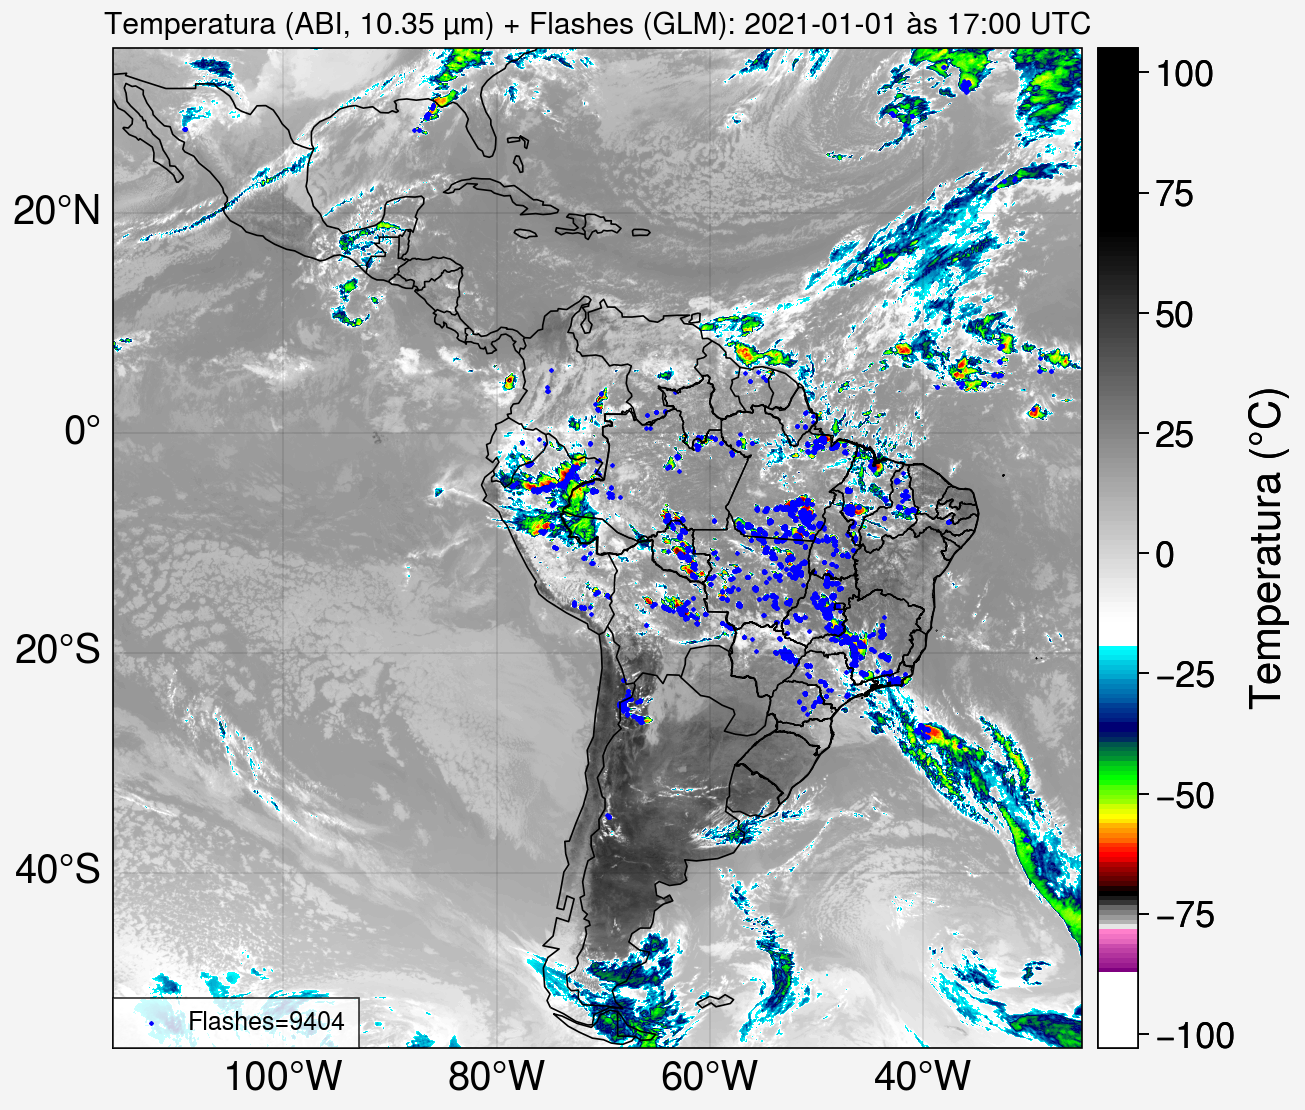

In [ ]:
# moldura da figura
fig, ax = plot.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax),
          title=f'Temperatura (ABI, 10.35 µm) + Flashes (GLM): {ano}-{mes}-{dia} às {hor}:{min} UTC',
          small='20px', large='15px')

# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 = ax.imshow(imagem,
                 cmap=cmap_ir,
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=plot.arange(-103.0, 105, 1.0))

# plota flashes
ax.scatter(lons_flash, lats_flash, transform=ccrs.PlateCarree(), marker='x', s=0.5, color='blue', label=f'Flashes={len(lats_flash)}')

# plota contorno dos Estados do Brasil
estados.plot(edgecolor='black', facecolor='none', linewidth=0.5, alpha=1, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=-0.0) #, length=0.99

# adiciona legenda
ax.legend(loc='ll', ncols=1, frameon=True)

# salva figura
fig.save(f'{dir}output/parte_1/Fig_1_goes16_flash_{ano}{mes}{dia}_{hor}{min}.jpg', dpi=300, bbox_inches='tight')

# **PARTE 3)**: Combinando imagem de satélite com flashes: Área com recorte

In [ ]:
# define a área de recorte
lonmin_rec, lonmax_rec, latmin_rec, latmax_rec = -42, -35, -30, -25

In [ ]:
# Leitura do arquivo para a área de recorte
imagem = xr.open_dataset(file_ir_download).sel(lon=slice(lonmin_rec, lonmax_rec), lat=slice(latmin_rec, latmax_rec))

# Limites da imagem
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

# Divide por 100 e transforma para Celsius
imagem = (imagem['Band1']/100.)-273.15

# Inverte a matriz
imagem = np.flipud(imagem)

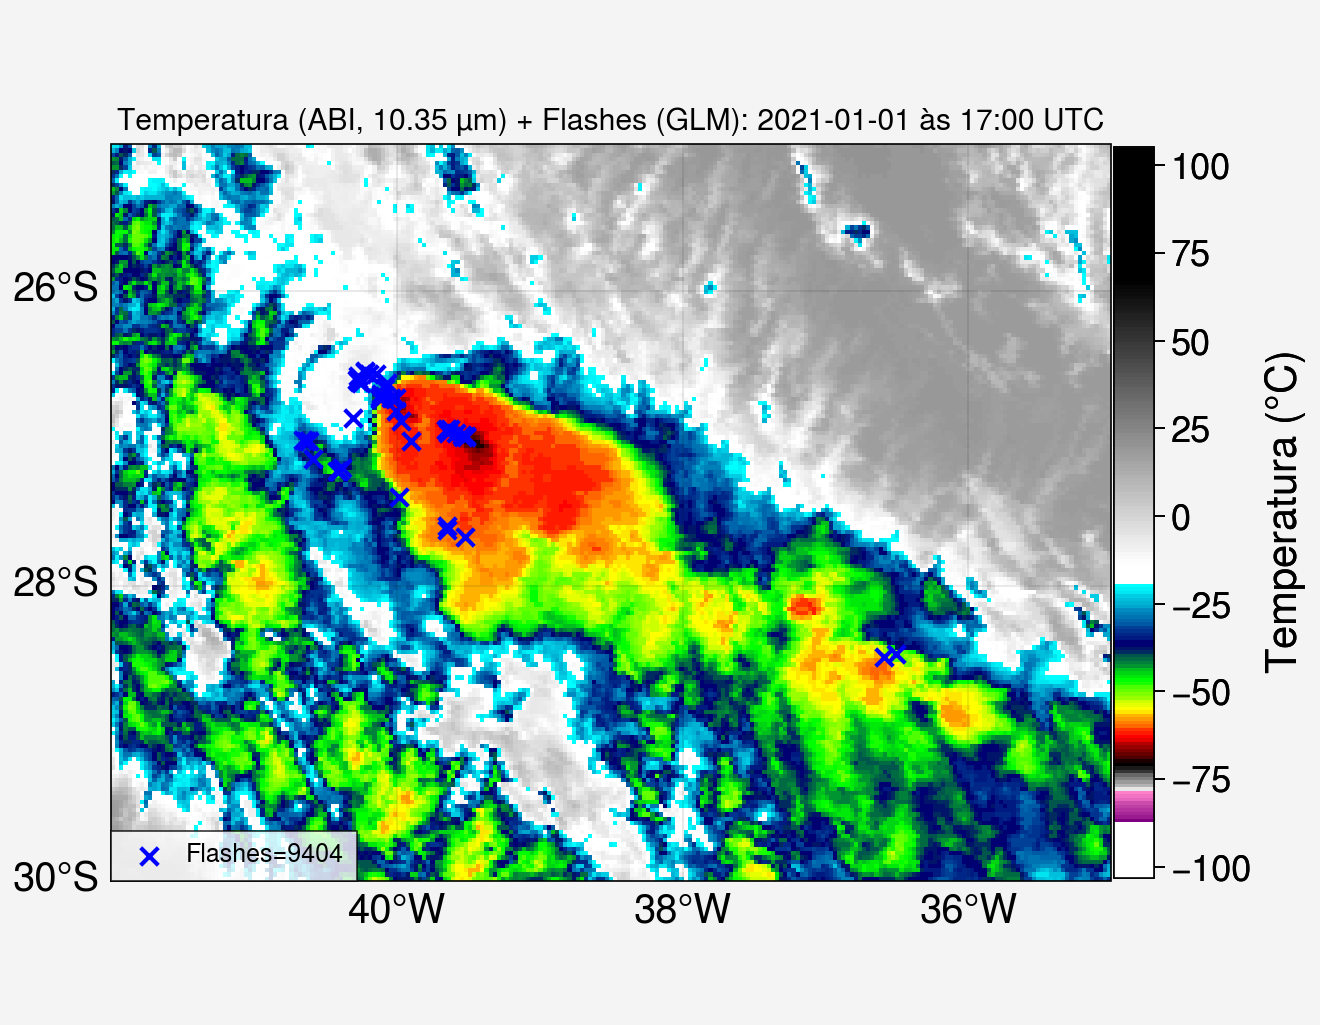

In [ ]:
# moldura da figura
fig, ax = plot.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=2, lonlines=2,
          latlim=(latmin_rec,latmax_rec), lonlim=(lonmin_rec,lonmax_rec),
          title=f'Temperatura (ABI, 10.35 µm) + Flashes (GLM): {ano}-{mes}-{dia} às {hor}:{min} UTC',
          small='20px', large='15px')

# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 = ax.imshow(imagem,
                 cmap=cmap_ir,
                 extent=[lonmin_rec, lonmax_rec, latmin_rec, latmax_rec],
                 levels=plot.arange(-103.0, 105, 1.0))

# plota flashes
ax.scatter(lons_flash, lats_flash, transform=ccrs.PlateCarree(), marker='x', s=40, color='blue', label=f'Flashes={len(lats_flash)}')

# plota contorno dos Estados do Brasil
estados.plot(edgecolor='black', facecolor='none', linewidth=0.5, alpha=1, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.1, length=0.73)

# adiciona legenda
ax.legend(loc='ll', ncols=1, frameon=True)

# salva figura
fig.save(f'{dir}output/parte_1/Fig_2_goes16_flash_{ano}{mes}{dia}_{hor}{min}_recorte.jpg', dpi=300, bbox_inches='tight')

# **PARTE 4)**: Faz animação das imagens combinadas de satélite e flashes: Área com recorte

##**a) Define o período de imagens de satélite**

In [ ]:
# data INICIAL
anoi, mesi, diai, hori, mini = 2021, 1, 1, 17, 0 # ano, mês, dia, hora e minuto inicial do período

# data FINAL
anof, mesf, diaf, horf, minf = 2021, 1, 1, 18, 30 # ano, mês, dia, hora e minuto final do período

In [ ]:
# define a área de recorte
lonmin_rec, lonmax_rec, latmin_rec, latmax_rec = -42, -35, -30, -25

##**b) Download das imagens de satélite**

In [ ]:
# Inicia o contador de tempo
start_time = t.time()

# Data desejada
date_in = datetime(anoi, mesi, diai, hori, mini)  # 2022-02-02 00:00:00
date_ini = date_in.strftime('%Y%m%d%H%M') # 20220202

date_en = datetime(anof, mesf, diaf, horf, minf)
date_end = date_en.strftime('%Y%m%d%H%M')

print('.... Processando Data ...:', date_ini, date_end, '\n')

# Download dos dados
files_imagens = []
for file in pd.date_range(date_ini, date_end, freq='10min'):

    # Extrai ano e mes
    data = file.strftime('%Y%m%d%H%M')
    ano = file.strftime('%Y')
    mes = file.strftime('%m')
    dia = file.strftime('%d')
    hor = file.strftime('%H')
    min = file.strftime('%M')

    # baixa imagem de satélite
    file_ir_download = download_ABI_CPTEC(ano, mes, dia, hor, min, canal)

    # salva o nomes das imagens baixadas
    files_imagens.append(file_ir_download)

# Contabiliza o tempo para baixar os dados
print('\nTempo de download dos dados:', round((t.time() - start_time),2), 'segundos.')

.... Processando Data ...: 202101011700 202101011830 

.... Baixando dado ===> DATA= 2021 01 01 17 00 / CANAL= ch13
--2023-11-08 18:23:32--  http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2021/01/S10635346_202101011700.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

.... Baixando dado ===> DATA= 2021 01 01 17 10 / CANAL= ch13
--2023-11-08 18:23:33--  http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2021/01/S10635346_202101011710.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13787269 (13M) [application/x-netcdf]
Saving to: ‘S10635346_202101011710.nc’

S10635346_202101011 100%[=====

In [ ]:
# mostra os nomes das imagens de satélite que foram baixadas
files_imagens

['/content/S10635346_202101011700.nc',
 '/content/S10635346_202101011710.nc',
 '/content/S10635346_202101011720.nc',
 '/content/S10635346_202101011730.nc',
 '/content/S10635346_202101011740.nc',
 '/content/S10635346_202101011750.nc',
 '/content/S10635346_202101011800.nc',
 '/content/S10635346_202101011810.nc',
 '/content/S10635346_202101011820.nc',
 '/content/S10635346_202101011830.nc']

##**c) Plotando as imagens de satélite + relâmpagos**

In [ ]:
# Loop nas imagens baixadas
for file in files_imagens:

    # extrai a data e horário da imagem
    basename = os.path.basename(os.path.splitext(file)[0]) # S10635334_202101011700.nc
    ano, mes, dia, hor, min = basename[10:14], basename[14:16], basename[16:18], basename[18:20], basename[20:22]

    print('---------------------------------------------------------------------')
    print('PROCESSANDO IMAGEM=', basename)
    print('---------------------------------------------------------------------')

    # Leitura do arquivo
    imagem = xr.open_dataset(file).sel(lon=slice(lonmin_rec, lonmax_rec), lat=slice(latmin_rec, latmax_rec))

    # Divide por 100 e transforma para Celsius
    imagem = (imagem['Band1']/100.)-273.15

    # Inverte a matriz
    imagem = np.flipud(imagem)

    # moldura da figura
    fig, ax = plot.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

    # define formato da figura
    ax.format(coast=False, borders=False, innerborders=False,
              labels=True,
              latlines=2, lonlines=2,
              latlim=(latmin,latmax), lonlim=(lonmin,lonmax),
              title=f'Temperatura (ABI, 10.35 µm) + Flashes (GLM): {ano}-{mes}-{dia} às {hor}:{min} UTC',
              small='20px', large='15px')

    # carrega tabela de cores
    cpt_ir = loadCPT(f'{dir}ir.cpt')
    cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

    # plota mapa
    map1 = ax.imshow(imagem,
                     cmap=cmap_ir,
                     extent=[lonmin_rec, lonmax_rec, latmin_rec, latmax_rec],
                     levels=plot.arange(-103.0, 105, 1.0))

    # baixa dados do GLM
    lats_event, lons_event, lats_group, lons_group, lats_flash, lons_flash = download_e_acumula_GLM(ano, mes, dia, hor, min)

    # plota flashes
    ax.scatter(lons_flash, lats_flash, transform=ccrs.PlateCarree(), marker='x', s=40, color='blue', label=f'Flashes={len(lats_flash)}')

    # plota contorno dos Estados do Brasil
    estados.plot(edgecolor='black', facecolor='none', linewidth=0.5, alpha=1, ax=ax)

    # plota barra de cores da figura
    fig.colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.1, length=0.73)

    # adiciona legenda
    ax.legend(loc='ll', ncols=1, frameon=True)

    # salva figura
    fig.save(f'{dir}output/parte_1/Fig_3_goes16_flash_{ano}{mes}{dia}_{hor}{min}_recorte.jpg', dpi=300, bbox_inches='tight')

Output hidden; open in https://colab.research.google.com to view.

##**Faz animação**

In [ ]:
# Images we want to include in the GIF
files = sorted(glob.glob(f'{dir}output/parte_1/Fig_3_goes16_flash_*.jpg'))
files

['/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_05_RELAMPAGOS/output/parte_1/Fig_3_goes16_flash_20210101_1700_recorte.jpg',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_05_RELAMPAGOS/output/parte_1/Fig_3_goes16_flash_20210101_1710_recorte.jpg',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_05_RELAMPAGOS/output/parte_1/Fig_3_goes16_flash_20210101_1720_recorte.jpg',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES M

In [57]:
# Create the GIF
images = []
for file in files:
    images.append(imageio.imread(file))

# Save the GIF
imageio.mimsave(f'{dir}output/parte_1/Fig_3_animation.gif',
                images,
                duration=5,
                loop=0)

# **PARTE 5)**: Combinando imagem de satélite com eventos, grupos e flashes: Área com recorte

##**a) Definindo data/horário e canal da imagem**

In [ ]:
# define data/horário e canal
ano, mes, dia, hor, min, canal = '2021', '01', '01', '17', '00', 'ch13'

In [ ]:
# baixa imagem de satélite do FTP do CPTEC
file_ir_download = download_ABI_CPTEC(ano, mes, dia, hor, min, canal)

.... Baixando dado ===> DATA= 2021 01 01 17 00 / CANAL= ch13
--2023-11-08 18:33:33--  http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2021/01/S10635346_202101011700.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



##**b) Acumula os flashes**

In [ ]:
# define data a INICIAL para acumular os relâmpagos
date_ini = str(datetime(int(ano), int(mes), int(dia), int(hor), int(min)))

# define data FINAL para acumular os relâmpagos
date_end = str(datetime(int(ano), int(mes), int(dia), int(hor), int(min)) + timedelta(minutes=10)) # soma 10 minutos na data inicial

In [ ]:
# mostra na tela as datas
print('Tipo da variável=', type(date_ini))
print('Tipo da variável=', type(date_end))
print('Data Inicial=', date_ini)
print('Data Final=', date_end)

Tipo da variável= <class 'str'>
Tipo da variável= <class 'str'>
Data Inicial= 2021-01-01 17:00:00
Data Final= 2021-01-01 17:10:00


In [ ]:
# inicializa os arrays de latitude e longitude
lats_event, lons_event = np.array([]), np.array([])
lats_group, lons_group = np.array([]), np.array([])
lats_flash, lons_flash = np.array([]), np.array([])

# loop da acumulação de relâmpagos
while (date_ini < date_end):

    # mostra na tela a data de processamento atual
    print('PROCESSANDO DATA....', date_ini)

    # estrutura da data
    yyyymmddhhmnss = datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%d%H%M%S')

    # baixando GLM
    file_glm = download_GLM(yyyymmddhhmnss, '/content')

    # leitura GLM
    ds = xr.open_dataset(f'/content/{file_glm}.nc')

    # apenda as lats/lons dos eventos, grupos e flashes
    lats_event = np.append(lats_event, ds['event_lat'])
    lons_event = np.append(lons_event, ds['event_lon'])

    lats_group = np.append(lats_group, ds['group_lat'])
    lons_group = np.append(lons_group, ds['group_lon'])

    lats_flash = np.append(lats_flash, ds['flash_lat'])
    lons_flash = np.append(lons_flash, ds['flash_lon'])

    # incrementa 20s no tempo
    date_ini = str(datetime.strptime(date_ini, '%Y-%m-%d %H:%M:%S') + timedelta(seconds=20))
    print('\n')

PROCESSANDO DATA.... 2021-01-01 17:00:00
File /content/OR_GLM-L2-LCFA_G16_s20210011700000_e20210011700204_c20210011700224.nc exists


PROCESSANDO DATA.... 2021-01-01 17:00:20
File /content/OR_GLM-L2-LCFA_G16_s20210011700200_e20210011700404_c20210011700425.nc exists


PROCESSANDO DATA.... 2021-01-01 17:00:40
File /content/OR_GLM-L2-LCFA_G16_s20210011700400_e20210011701003_c20210011701027.nc exists


PROCESSANDO DATA.... 2021-01-01 17:01:00
File /content/OR_GLM-L2-LCFA_G16_s20210011701000_e20210011701205_c20210011701229.nc exists


PROCESSANDO DATA.... 2021-01-01 17:01:20
File /content/OR_GLM-L2-LCFA_G16_s20210011701200_e20210011701405_c20210011701419.nc exists


PROCESSANDO DATA.... 2021-01-01 17:01:40
File /content/OR_GLM-L2-LCFA_G16_s20210011701400_e20210011702003_c20210011702032.nc exists


PROCESSANDO DATA.... 2021-01-01 17:02:00
File /content/OR_GLM-L2-LCFA_G16_s20210011702000_e20210011702205_c20210011702229.nc exists


PROCESSANDO DATA.... 2021-01-01 17:02:20
File /content/OR_GLM-

##**c) Plota imagem**

In [ ]:
# Leitura do arquivo para a área de recorte
imagem = xr.open_dataset(file_ir_download).sel(lon=slice(lonmin_rec, lonmax_rec), lat=slice(latmin_rec, latmax_rec))

# Limites da imagem
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

# Divide por 100 e transforma para Celsius
imagem = (imagem['Band1']/100.)-273.15

# Inverte a matriz
imagem = np.flipud(imagem)

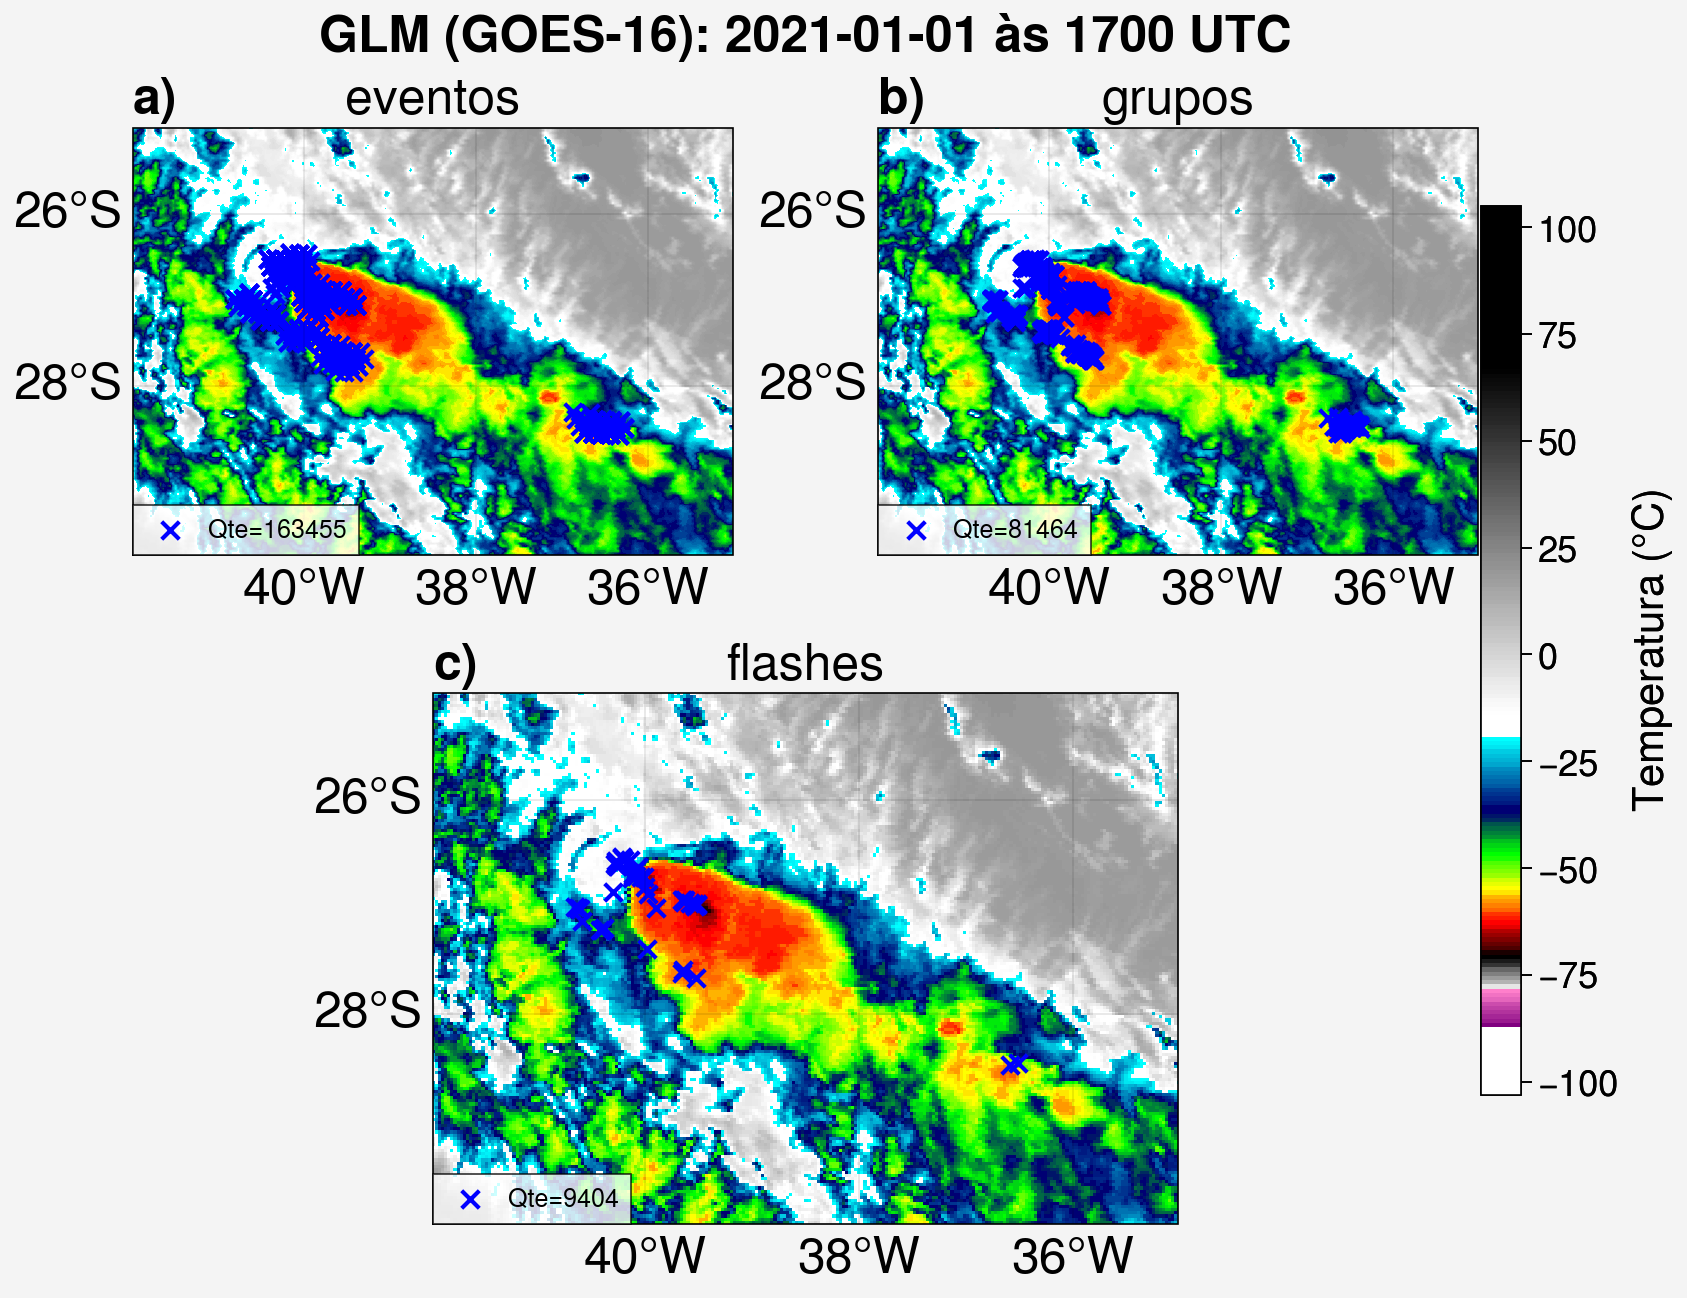

In [ ]:
# define a moldura da figura
fig, ax = plot.subplots([[1, 1, 2, 2],[0, 3, 3, 0]], axwidth=3, axheight=3, tight=True, proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=2, lonlines=2,
          suptitle=f'GLM (GOES-16): {ano}-{mes}-{dia} às {hor}{min} UTC',
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='25px')

# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

#--------------------------------#
#    FIG 1: PLOTA EVENTOS
#--------------------------------#
# plota mapa
map1 = ax[0].imshow(imagem,
                    cmap=cmap_ir,
                    extent=[lonmin_rec, lonmax_rec, latmin_rec, latmax_rec],
                    levels=plot.arange(-103.0, 105, 1.0))

# plota os eventos
ax[0].scatter(lons_event, lats_event, transform=ccrs.PlateCarree(), marker='x', s=40, color='blue', label=f'Qte={len(lats_event)}')

# define título da figura
ax[0].format(title='eventos')

#--------------------------------#
#    FIG 2: PLOTA GRUPOS
#--------------------------------#
# plota mapa
ax[1].imshow(imagem,
             cmap=cmap_ir,
             extent=[lonmin_rec, lonmax_rec, latmin_rec, latmax_rec],
             levels=plot.arange(-103.0, 105, 1.0))

# plota os grupos
ax[1].scatter(lons_group, lats_group, transform=ccrs.PlateCarree(), marker='x', s=40, color='blue', label=f'Qte={len(lats_group)}')

# define título da figura
ax[1].format(title='grupos')

#--------------------------------#
#    FIG 3: PLOTA FLASHES
#--------------------------------#
ax[2].imshow(imagem,
             cmap=cmap_ir,
             extent=[lonmin_rec, lonmax_rec, latmin_rec, latmax_rec],
             levels=plot.arange(-103.0, 105, 1.0))

# plota os flashes
ax[2].scatter(lons_flash, lats_flash, transform=ccrs.PlateCarree(), marker='x', s=40, color='blue', label=f'Qte={len(lats_flash)}')

# define título da figura
ax[2].format(title='flashes')
#--------------------------------#

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.1, length=0.73)

# adiciona legenda
ax.legend(loc='ll', ncols=1, frameon=True)

# salva figura
fig.save(f'{dir}output/parte_1/Fig_4_goes16_evento_grupo_flash_{ano}{mes}{dia}_{hor}{min}_recorte.jpg', dpi=300, bbox_inches='tight')